In [2]:
# Importing an reading dataset
import pandas as pd
df = pd.read_excel("/Users/ramyavissapragada/Downloads/hand_injury_analysis.xlsx")
df

,EventDate,Employer,City,State,Zip,Latitude,Longitude,Primary NAICS,Hospitalized,Amputation,...,Source,SourceTitle,FederalState,General Nature,General Part of Body,General Event,General Source,General Secondary Source,NAICS Desc,Hand_Injury_Flag
0,2023-12-31,KLX Energy Services,CHARLOTTE,TEXAS,78011,28.86,-98.70,213112,1,1,...,6511,"Doors, except garage and vehicle",1,Surface and flesh wounds,Upper Extremities,Contact Incidents,Structures and Surfaces,No Secondary,Manufacturing,True
1,2023-12-30,"Liveo Research, Inc.",DELAWARE CITY,DELAWARE,19706,39.58,-75.64,326112,0,1,...,3599,"Metal, woodworking, and special material machi...",1,Surface and flesh wounds,Upper Extremities,Contact Incidents,Machinery,No Secondary,Manufacturing,True
2,2023-12-29,Best Pump and Flow,FORT WORTH,TEXAS,76185,32.69,-97.52,333132,0,1,...,3551,Metalworking lathes,1,Surface and flesh wounds,Upper Extremities,Contact Incidents,Machinery,No Secondary,Manufacturing,True
3,2023-12-29,Leidy's LLC,SOUDERTON,PENNSYLVANIA,18964,40.30,-75.32,311612,0,1,...,3715,Butchering machinery,1,Surface and flesh wounds,Upper Extremities,Contact Incidents,Machinery,No Secondary,Manufacturing,True
4,2023-12-29,FORD MOTOR COMPANY,BUFFALO,NEW YORK,14219,42.78,-78.84,336370,0,1,...,3311,Air conditioning units,1,Surface and flesh wounds,Upper Extremities,Contact Incidents,Machinery,Vehicles,Manufacturing,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17893,2015-01-01,Gopher Resource,TAMPA,FLORIDA,33619,27.96,-82.38,331492,0,1,...,370,"Special process machinery, unspecified",1,Surface and flesh wounds,Upper Extremities,Contact Incidents,Machinery,No Secondary,Manufacturing,True
17894,2015-01-30,Schiavone Construction Co. LLC,JERSEY CITY,NEW JERSEY,7306,40.73,-74.07,237310,1,1,...,7224,"Saws-powered, except chainsaws",1,Surface and flesh wounds,Upper Extremities,Contact Incidents,"Tools, Instruments, and Equipment",No Secondary,Manufacturing,True
17895,2015-01-01,North American Pipe Corporation,JANESVILLE,WISCONSIN,53545,42.67,-89.04,326122,1,0,...,350,"Metal, woodworking, and special material machi...",1,"Injuries to the brain, spinal cord",Upper Extremities,Contact Incidents,Machinery,No Secondary,Manufacturing,True
17896,2015-01-30,"Schiavone Construction Co, Inc",JERSEY CITY,NEW JERSEY,7306,40.73,-74.07,237310,1,1,...,7220,"Cutting handtools-powered, unspecified",1,Surface and flesh wounds,Upper Extremities,Contact Incidents,"Tools, Instruments, and Equipment",No Secondary,Manufacturing,True


# 1. Top Sources Causing Hand Injuries

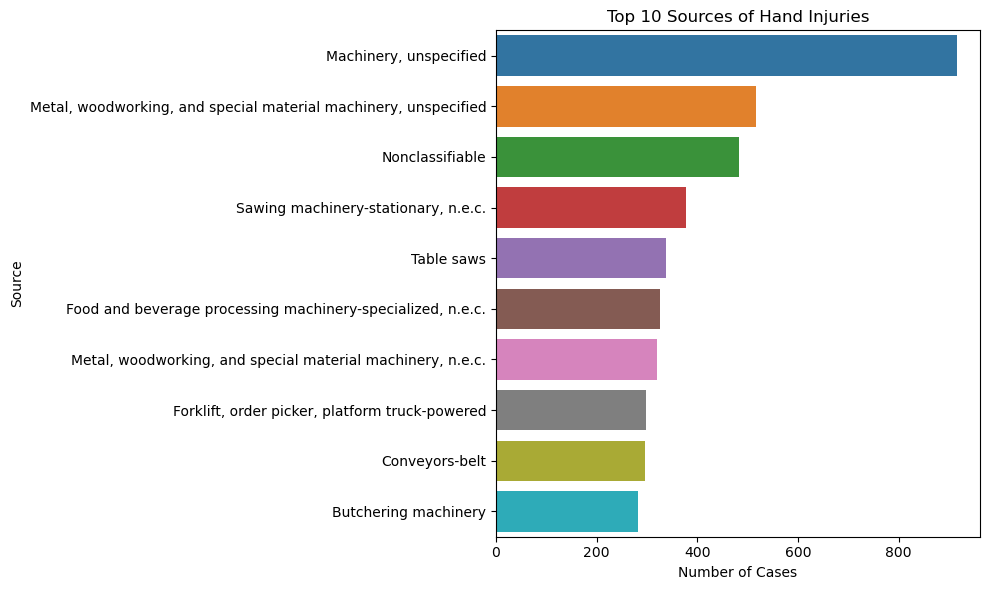

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

top_sources = df['SourceTitle'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_sources.values, y=top_sources.index)
plt.title("Top 10 Sources of Hand Injuries")
plt.xlabel("Number of Cases")
plt.ylabel("Source")
plt.tight_layout()
plt.show()


# 2. Top Events Leading to Hand Injuries

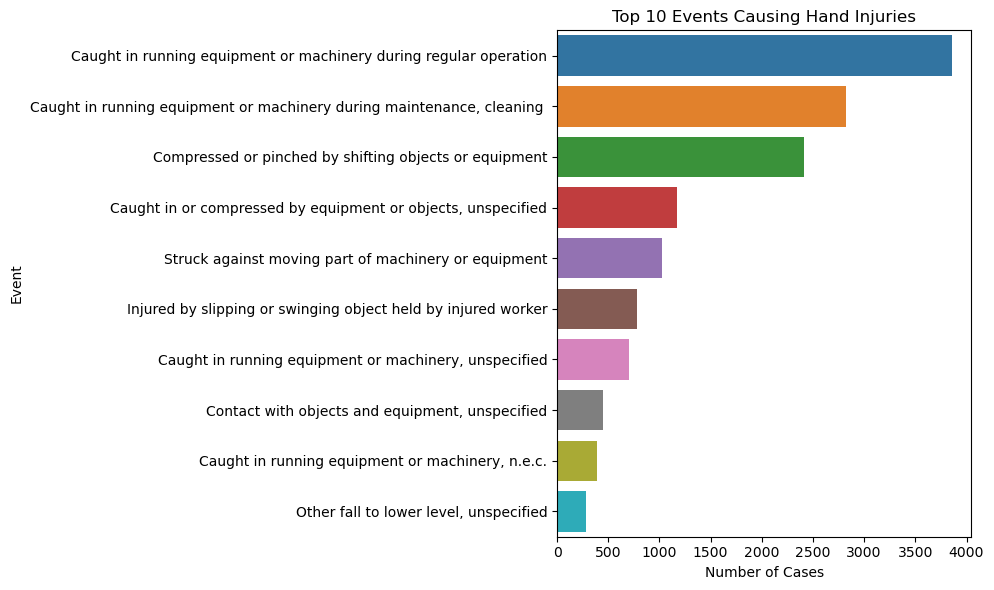

In [23]:
top_events = df['EventTitle'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_events.values, y=top_events.index)
plt.title("Top 10 Events Causing Hand Injuries")
plt.xlabel("Number of Cases")
plt.ylabel("Event")
plt.tight_layout()
plt.show()


In [11]:
!pip install keybert

  Obtaining dependency information for keybert from https://files.pythonhosted.org/packages/82/07/e2f42a8ec3ff1935debbf2a5255570d22033fca3fe3180d5af99a6c9ee8c/keybert-0.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for sentence-transformers>=0.3.8 from https://files.pythonhosted.org/packages/6d/8a/02de456f970bb53fc456b266d59d983a255de00cee648ab318c1f62d9aa1/sentence_transformers-4.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.41.0 from https://files.pythonhosted.org/packages/aa/22/733a6fc4a6445d835242f64c490fdd30f4a08d58f2b788613de3f9170692/transformers-4.50.3-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/3f/14/e105b8ef6d324e789c1589e95cb0ab63f3e07c2216d68b1178b7c21b7d2a/torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for huggingface-hub>=0.20.0 from https://files.pythonhosted.org/packages/40/0c/37d38084

In [12]:
# Import necessary libraries
import pandas as pd
import spacy
from collections import Counter
from itertools import chain


# Filter the top 10 events causing hand injuries
top_events = df['EventTitle'].value_counts().head(10).index
filtered_data = df[df['EventTitle'].isin(top_events)]

# Extract narratives corresponding to the top 10 events
narratives = filtered_data[['EventTitle', 'Final Narrative']]

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Define a function to extract root causes (keywords) from narratives
def extract_root_causes(narrative):
    doc = nlp(narrative)
    # Extract nouns and verbs as potential root causes
    keywords = [token.text for token in doc if token.pos_ in ["NOUN", "VERB"] and not token.is_stop]
    return keywords

# Apply the function to extract root causes from narratives
narratives['Root Causes'] = narratives['Final Narrative'].apply(extract_root_causes)

# Aggregate root causes for each event type
root_cause_summary = narratives.groupby('EventTitle').agg({
    'Final Narrative': 'count',
    'Root Causes': lambda x: Counter(chain.from_iterable(x)).most_common(10)
}).rename(columns={'Final Narrative': 'Number of Cases'})

# Display the summary of root causes for each event type
print(root_cause_summary)

# Optional: Save results to a CSV file for further analysis or visualization


                                                    Number of Cases  \
EventTitle                                                            
Caught in or compressed by equipment or objects...             1174   
Caught in running equipment or machinery during...             2818   
Caught in running equipment or machinery during...             3855   
Caught in running equipment or machinery, n.e.c.                392   
Caught in running equipment or machinery, unspe...              698   
Compressed or pinched by shifting objects or eq...             2413   
Contact with objects and equipment, unspecified                 447   
Injured by slipping or swinging object held by ...              780   
Other fall to lower level, unspecified                          285   
Struck against moving part of machinery or equi...             1024   

                                                                                          Root Causes  
EventTitle                                 

/var/folders/9n/6229qxsn2nb0ccgf0xrsgxb00000gp/T/ipykernel_3577/2251033253.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narratives['Root Causes'] = narratives['Final Narrative'].apply(extract_root_causes)


In [31]:
# Import necessary libraries
import pandas as pd
import spacy
from collections import Counter
from itertools import chain


# Filter the top 10 events causing hand injuries
top_events = df['SourceTitle'].value_counts().head(10).index
filtered_data = df[df['SourceTitle'].isin(top_events)]

# Extract narratives corresponding to the top 10 events
narratives = filtered_data[['SourceTitle', 'Final Narrative']]

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Define a function to extract root causes (keywords) from narratives
def extract_root_causes(narrative):
    doc = nlp(narrative)
    # Extract nouns and verbs as potential root causes
    keywords = [token.text for token in doc if token.pos_ in ["NOUN", "VERB"] and not token.is_stop]
    return keywords

# Apply the function to extract root causes from narratives
narratives['Root Causes'] = narratives['Final Narrative'].apply(extract_root_causes)

# Aggregate root causes for each event type
source_root_cause_summary = narratives.groupby('SourceTitle').agg({
    'Final Narrative': 'count',
    'Root Causes': lambda x: Counter(chain.from_iterable(x)).most_common(10)
}).rename(columns={'Final Narrative': 'Number of Cases'})

# Display the summary of root causes for each event type
print(source_root_cause_summary)

                                                    Number of Cases  \
SourceTitle                                                           
Butchering machinery                                            283   
Conveyors-belt                                                  296   
Food and beverage processing machinery-speciali...              326   
Forklift, order picker, platform truck-powered                  298   
Machinery, unspecified                                          916   
Metal, woodworking, and special material machin...              320   
Metal, woodworking, and special material machin...              516   
Nonclassifiable                                                 482   
Sawing machinery-stationary, n.e.c.                             378   
Table saws                                                      337   

                                                                                          Root Causes  
SourceTitle                                

/var/folders/9n/6229qxsn2nb0ccgf0xrsgxb00000gp/T/ipykernel_3577/1304501747.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  narratives['Root Causes'] = narratives['Final Narrative'].apply(extract_root_causes)


In [13]:
root_cause_summary.to_csv("/Users/ramyavissapragada/Downloads/event_root_cause_summary.csv", index=True)


In [33]:
source_root_cause_summary.to_csv("/Users/ramyavissapragada/Downloads/source_event_root_cause_summary.csv", index=True)


In [49]:
dark_blue = '#1F4E79'
olive_green = '#BBA037'
colors = [dark_blue, olive_green, dark_blue, olive_green, dark_blue]

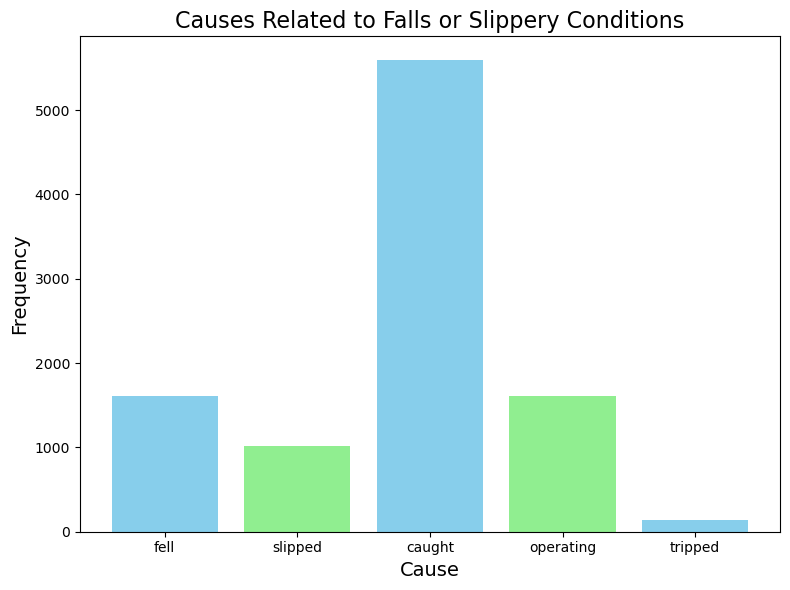

In [50]:
# Filter narratives for keywords like "fell" and "slipped"
fall_related_keywords = ['fell', 'slipped', 'caught', 'operating', 'tripped']
fall_related_counts = {}

for keyword in fall_related_keywords:
    fall_related_counts[keyword] = df['Final Narrative'].str.contains(keyword, case=False, na=False).sum()

# Plot causes related to falls or slippery conditions
plt.figure(figsize=(8, 6))
plt.bar(fall_related_counts.keys(), fall_related_counts.values(), color=['skyblue', 'lightgreen'])
plt.title("Causes Related to Falls or Slippery Conditions", fontsize=16)
plt.xlabel("Cause", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

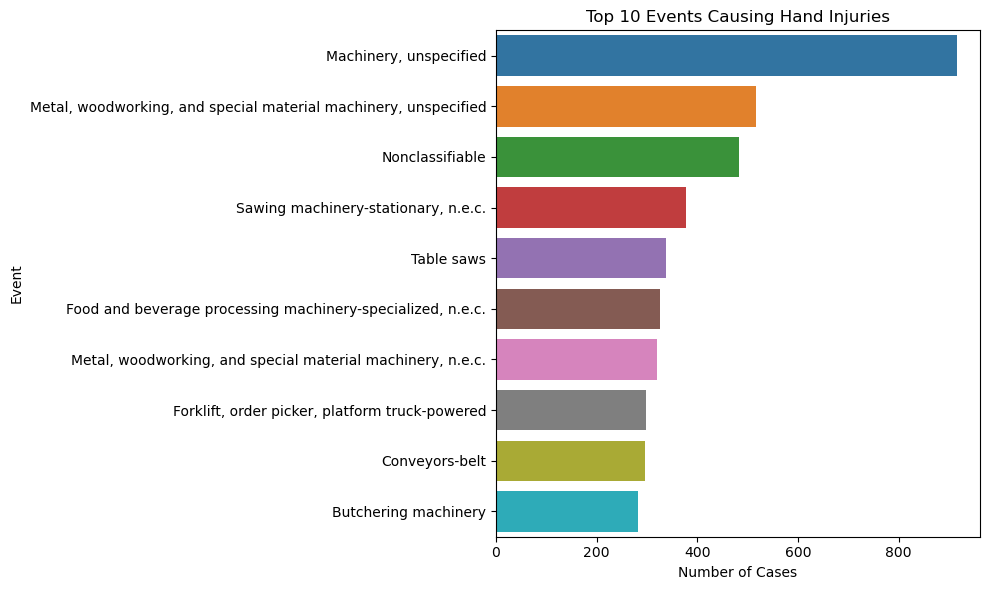

In [24]:
top_events = df['SourceTitle'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_events.values, y=top_events.index)
plt.title("Top 10 Events Causing Hand Injuries")
plt.xlabel("Number of Cases")
plt.ylabel("Event")
plt.tight_layout()
plt.show()

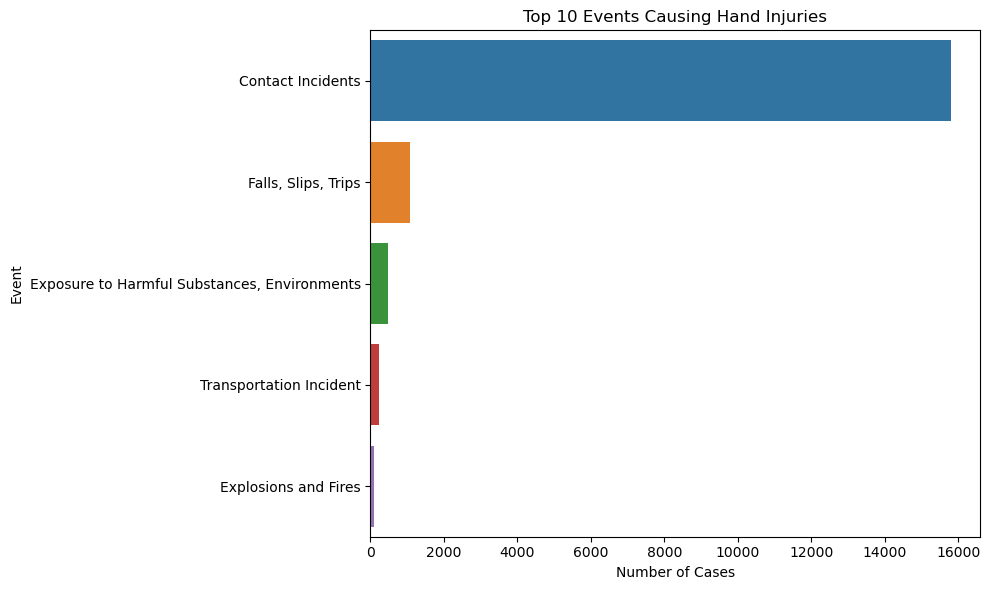

In [36]:
top_events = df['General Event'].value_counts().head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=top_events.values, y=top_events.index)
plt.title("Top 10 Events Causing Hand Injuries")
plt.xlabel("Number of Cases")
plt.ylabel("Event")
plt.tight_layout()
plt.show()

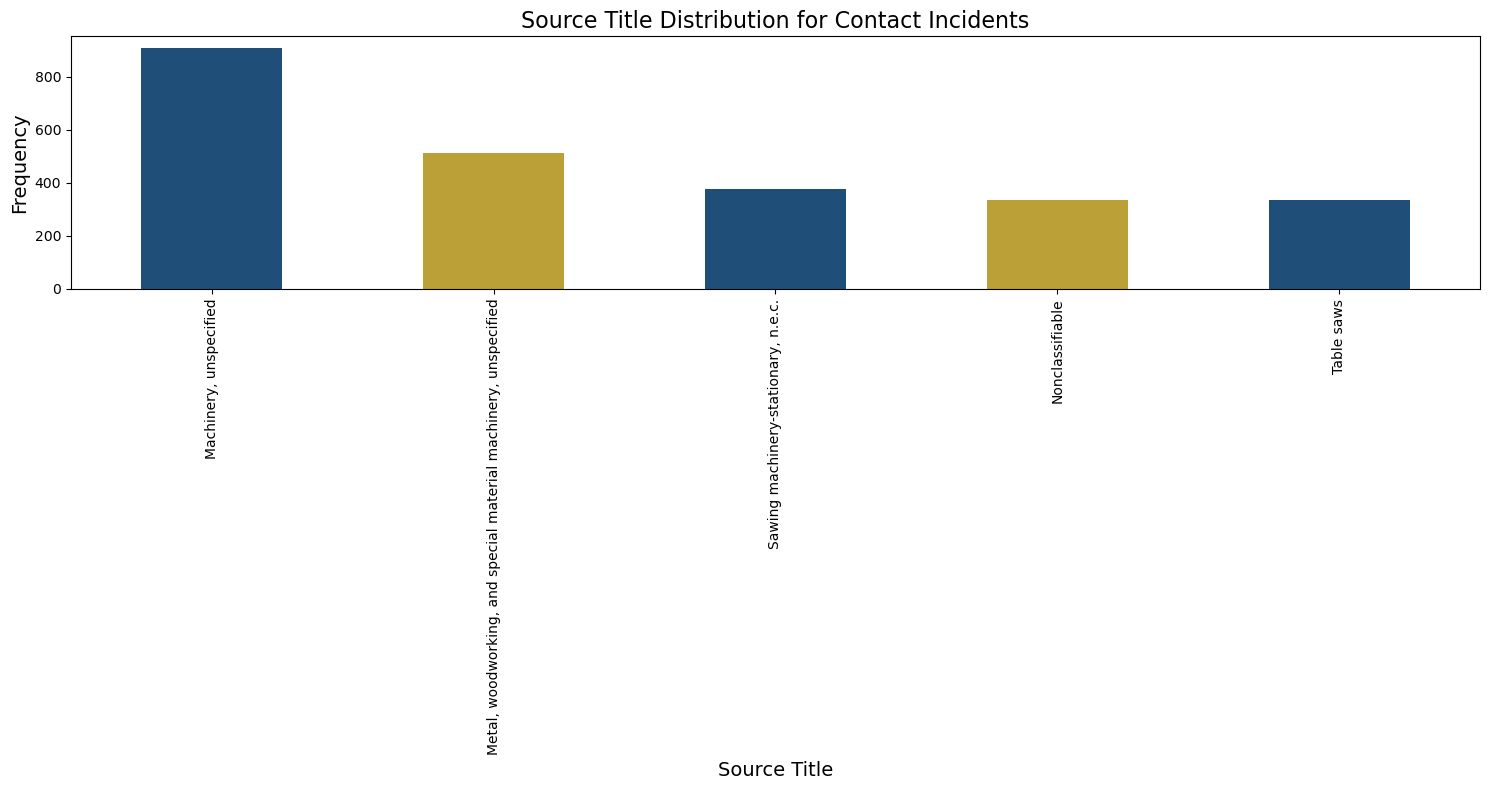

In [51]:
# For Contact
contact_data = df[df['General Event'].str.contains('Contact Incidents', case=False, na=False)]

# Analyze the Source Title distribution within the filtered transportation dataset
source_title_distribution = contact_data['SourceTitle'].value_counts().head(5)

# Visualize the Source Title distribution for transportation events
plt.figure(figsize=(15, 8))
source_title_distribution.plot(kind='bar', color=colors)
plt.title("Source Title Distribution for Contact Incidents", fontsize=16)
plt.xlabel("Source Title", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

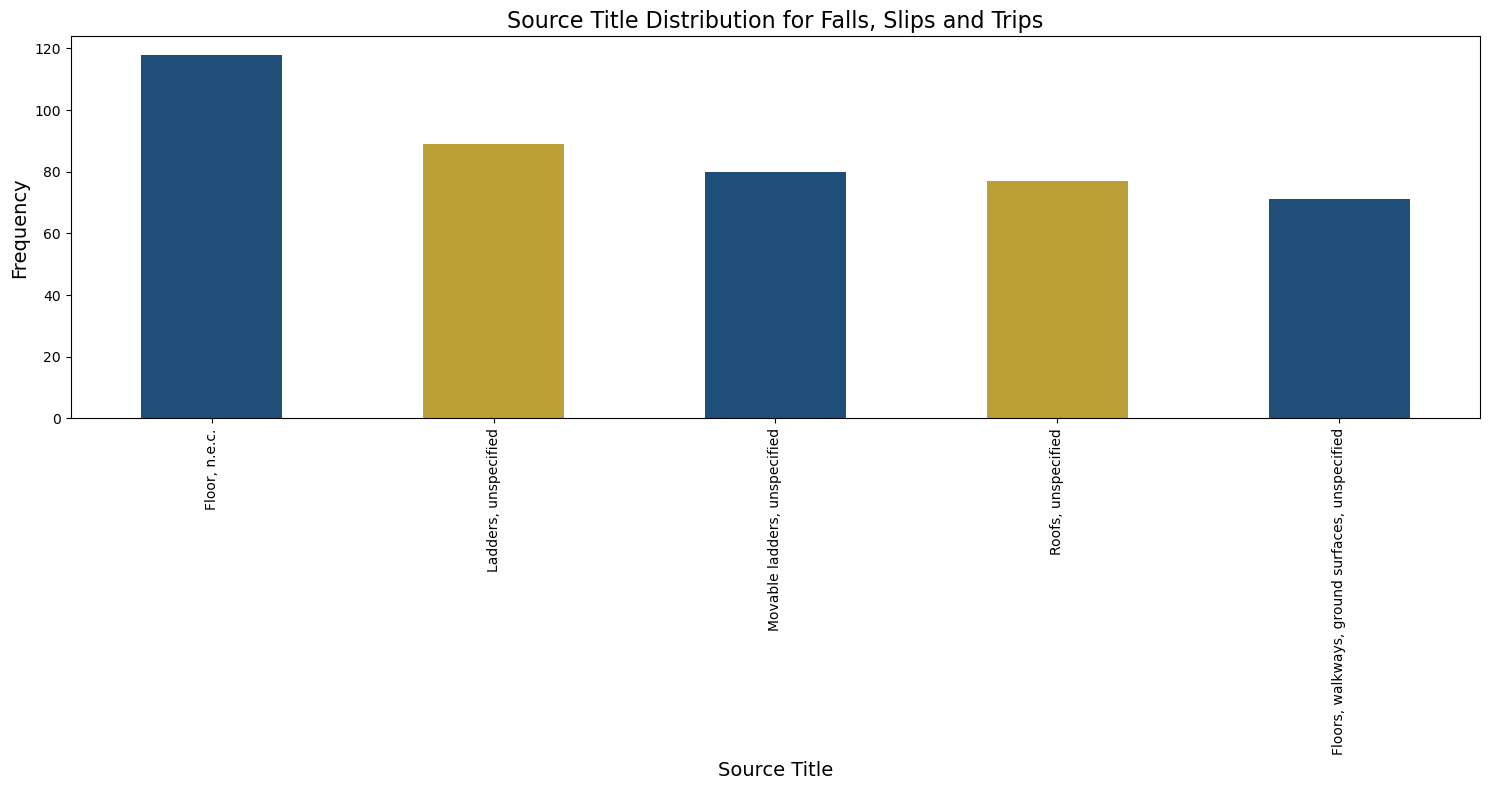

In [52]:
# For Falls, Slips and Trips
fall = df[df['General Event'].str.contains('Falls, Slips, Trips', case=False, na=False)]

# Analyze the Source Title distribution within the filtered transportation dataset
source_title_distribution = fall['SourceTitle'].value_counts().head(5)

# Visualize the Source Title distribution for transportation events
plt.figure(figsize=(15, 8))
source_title_distribution.plot(kind='bar', color=colors)
plt.title("Source Title Distribution for Falls, Slips and Trips", fontsize=16)
plt.xlabel("Source Title", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

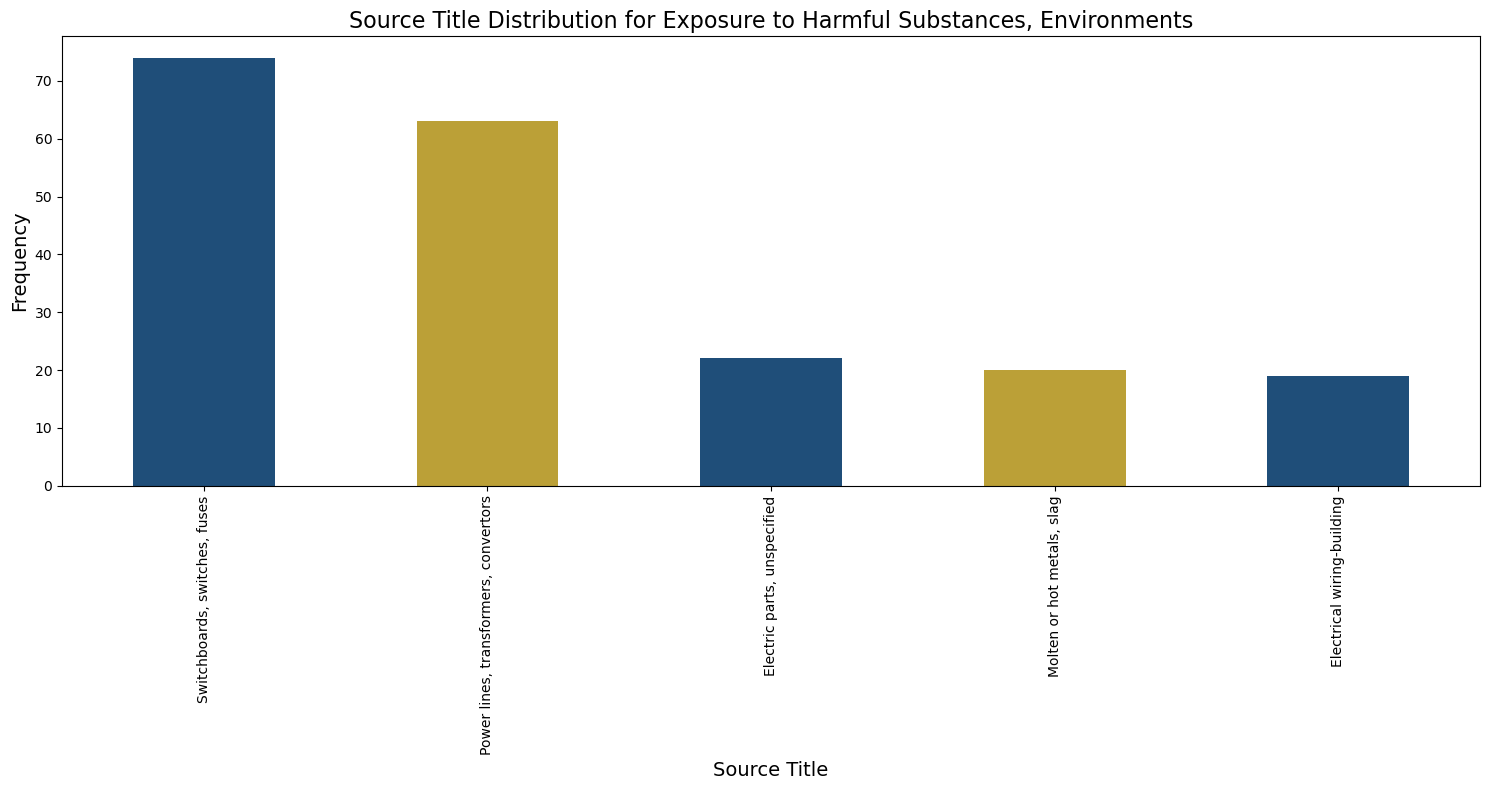

In [53]:
# For Exposure to harmful Substances and Environments
harmful = df[df['General Event'].str.contains('Exposure to Harmful Substances, Environments', case=False, na=False)]

# Analyze the Source Title distribution within the filtered transportation dataset
source_title_distribution = harmful['SourceTitle'].value_counts().head(5)

# Visualize the Source Title distribution for transportation events
plt.figure(figsize=(15, 8))
source_title_distribution.plot(kind='bar', color=colors)
plt.title("Source Title Distribution for Exposure to Harmful Substances, Environments", fontsize=16)
plt.xlabel("Source Title", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

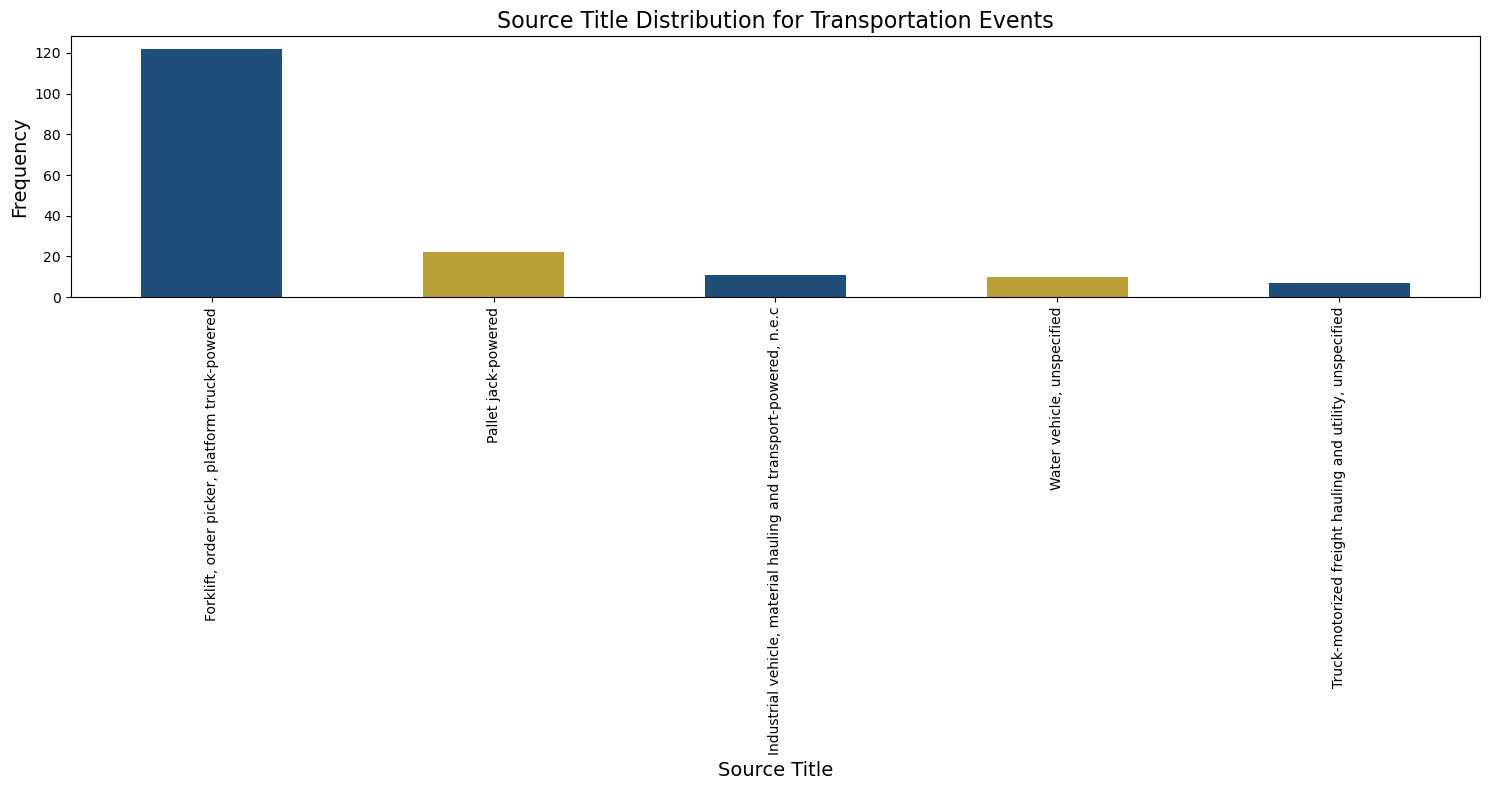

In [54]:
# For Transportation
transportation_data = df[df['General Event'].str.contains('transportation', case=False, na=False)]

# Analyze the Source Title distribution within the filtered transportation dataset
source_title_distribution = transportation_data['SourceTitle'].value_counts().head(5)

# Visualize the Source Title distribution for transportation events
plt.figure(figsize=(15, 8))
source_title_distribution.plot(kind='bar', color=colors)
plt.title("Source Title Distribution for Transportation Events", fontsize=16)
plt.xlabel("Source Title", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4.Monthly Trend of Hand Injuries

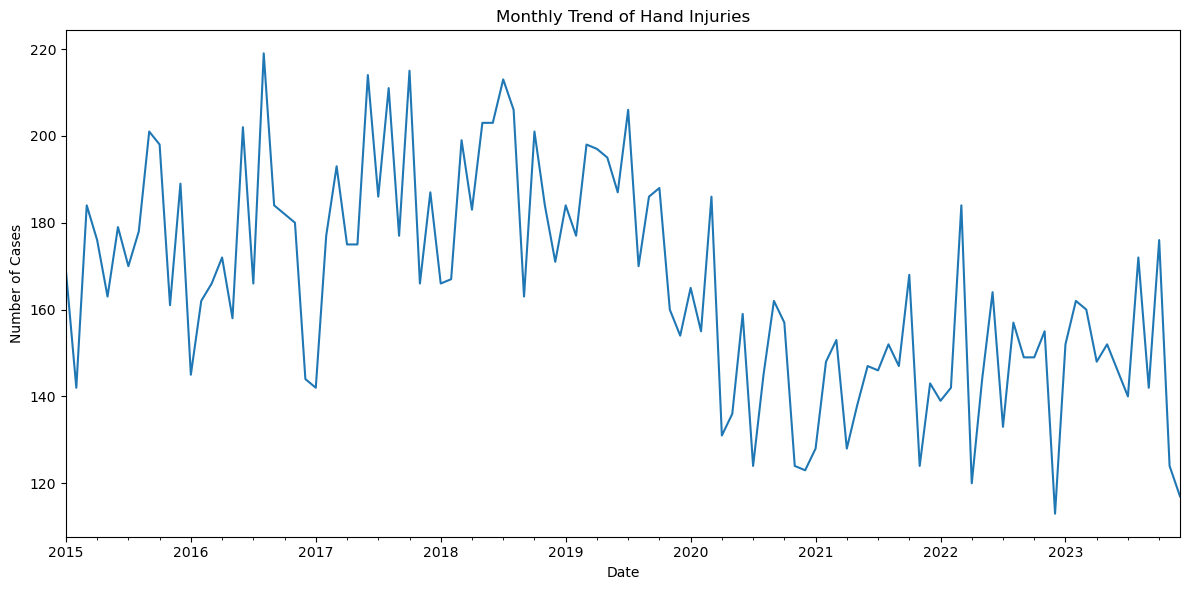

In [5]:
df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')
monthly_trend = df.set_index('EventDate').resample('M').size()

plt.figure(figsize=(12, 6))
monthly_trend.plot()
plt.title("Monthly Trend of Hand Injuries")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()


# 5.Hospitalization vs Amputation Analysis

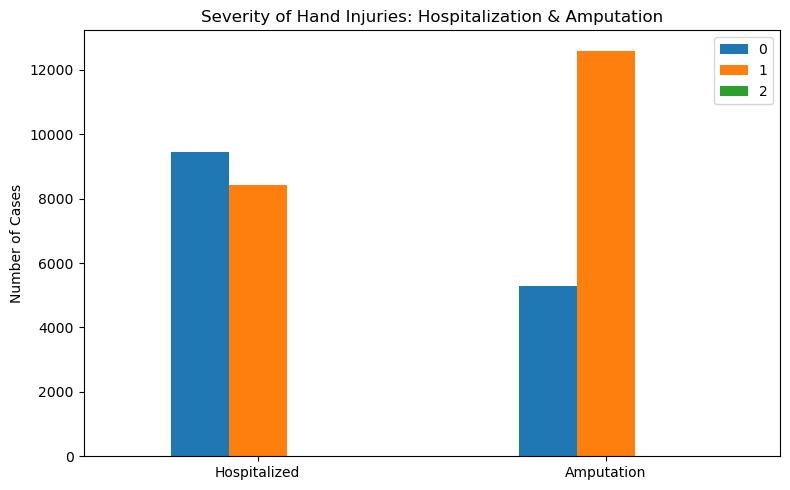

In [6]:
injury_stats = df[['Hospitalized', 'Amputation']].apply(lambda x: x.value_counts()).T

injury_stats.plot(kind='bar', figsize=(8, 5))
plt.title("Severity of Hand Injuries: Hospitalization & Amputation")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


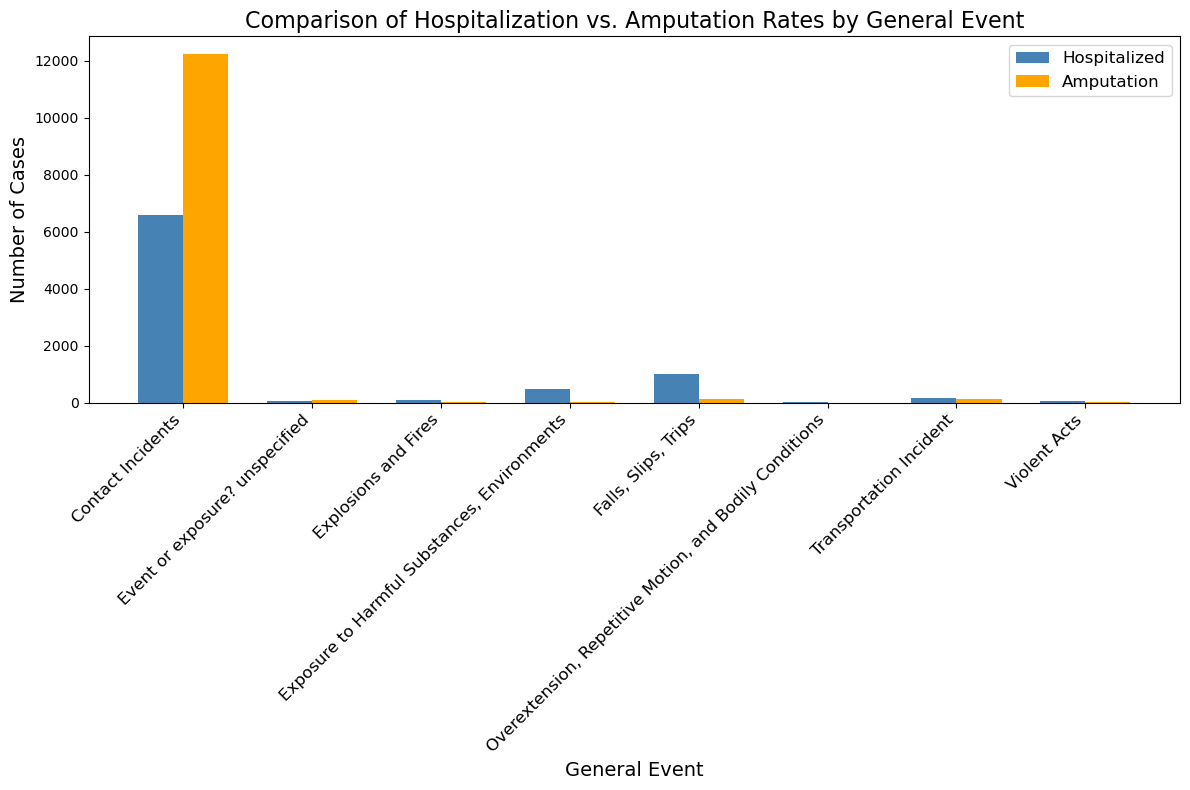

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("/Users/ramyavissapragada/Downloads/hand_injury_analysis.xlsx")

# Group data by General Event and calculate hospitalization and amputation rates
general_event_stats = df.groupby('General Event')[['Hospitalized', 'Amputation']].apply(lambda x: x.apply(pd.Series.value_counts)).fillna(0)

# Reset index and pivot for visualization
general_event_stats = general_event_stats.reset_index()
general_event_stats = general_event_stats.pivot(index='General Event', columns='level_1', values=['Hospitalized', 'Amputation']).fillna(0)

# Extract hospitalization and amputation data
hospitalized_data = general_event_stats['Hospitalized']
amputation_data = general_event_stats['Amputation']

# Prepare data for visualization
x = np.arange(len(hospitalized_data))  # Label locations
width = 0.35  # Width of the bars

# Plot side-by-side comparison
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width/2, hospitalized_data[1], width, label='Hospitalized', color='steelblue')
rects2 = ax.bar(x + width/2, amputation_data[1], width, label='Amputation', color='orange')

# Add labels, title, and legend
ax.set_xlabel('General Event', fontsize=14)
ax.set_ylabel('Number of Cases', fontsize=14)
ax.set_title('Comparison of Hospitalization vs. Amputation Rates by General Event', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(hospitalized_data.index, rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

To check for some observations from the dataset that the amputation incidents haven't been recorded in the hospital 

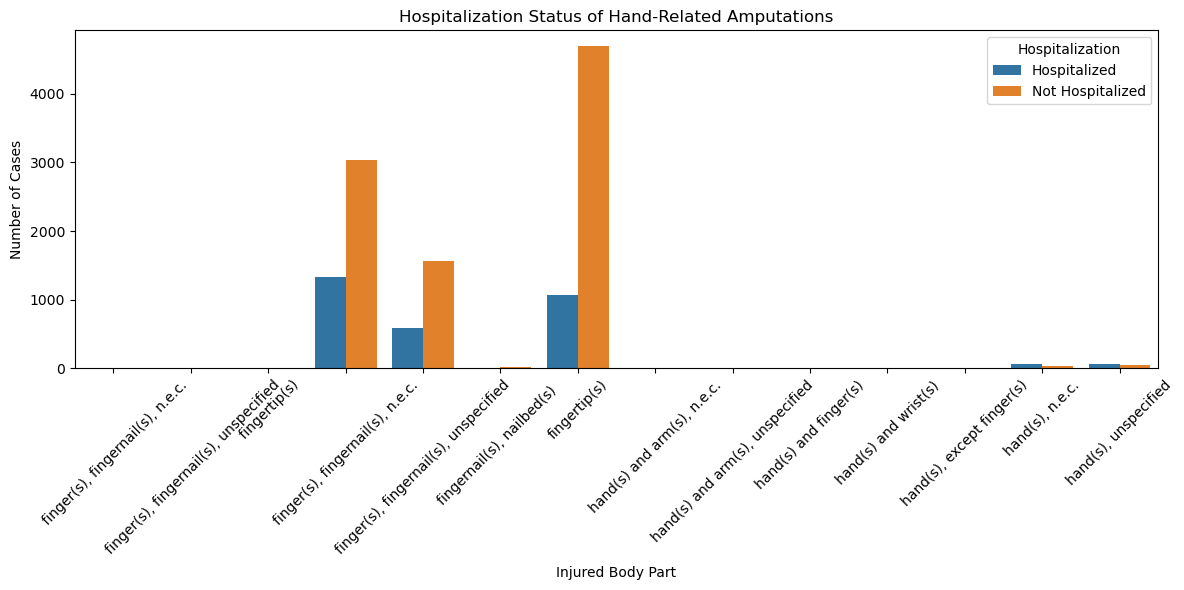

In [7]:

# Normalize relevant columns
df['Amputation'] = df['Amputation'].astype(str).str.strip()
df['Hospitalized'] = df['Hospitalized'].astype(str).str.strip()
df['Part of Body Title'] = df['Part of Body Title'].astype(str).str.lower()

# Filter rows where amputation occurred (Amputation == '1')
amputation_cases = df[df['Amputation'] == '1'].copy()

# Create a new column indicating hospitalization status
amputation_cases['Hospitalized_Flag'] = amputation_cases['Hospitalized'].apply(
    lambda x: 'Hospitalized' if x == '1' else 'Not Hospitalized'
)

# Focus only on fingertip-related injuries
fingertip_keywords = ['finger', 'fingertip', 'thumb', 'hand']
amputation_hand = amputation_cases[
    amputation_cases['Part of Body Title'].str.contains('|'.join(fingertip_keywords), na=False)
]

# Group by body part and hospitalization flag
summary = amputation_hand.groupby(['Part of Body Title', 'Hospitalized_Flag']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=summary, x='Part of Body Title', y='Count', hue='Hospitalized_Flag')
plt.title("Hospitalization Status of Hand-Related Amputations")
plt.xlabel("Injured Body Part")
plt.ylabel("Number of Cases")
plt.legend(title="Hospitalization")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


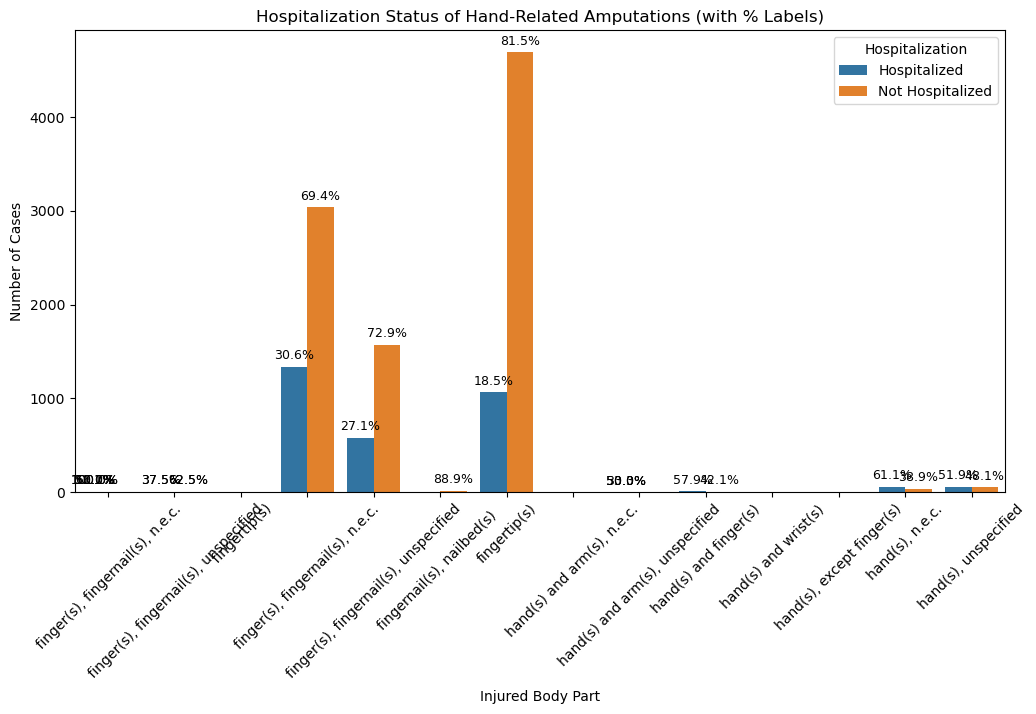

In [8]:


# Normalize relevant columns
df['Amputation'] = df['Amputation'].astype(str).str.strip()
df['Hospitalized'] = df['Hospitalized'].astype(str).str.strip()
df['Part of Body Title'] = df['Part of Body Title'].astype(str).str.lower()

# Filter rows where amputation occurred
amputation_cases = df[df['Amputation'] == '1'].copy()

# Create hospitalization flag
amputation_cases['Hospitalized_Flag'] = amputation_cases['Hospitalized'].apply(
    lambda x: 'Hospitalized' if x == '1' else 'Not Hospitalized'
)

# Focus on relevant hand-related parts
fingertip_keywords = ['finger', 'fingertip', 'thumb', 'hand']
amputation_hand = amputation_cases[
    amputation_cases['Part of Body Title'].str.contains('|'.join(fingertip_keywords), na=False)
]

# Group and count
summary = amputation_hand.groupby(['Part of Body Title', 'Hospitalized_Flag']).size().reset_index(name='Count')

# Calculate percentage within each body part
total_per_part = summary.groupby('Part of Body Title')['Count'].transform('sum')
summary['Percentage'] = (summary['Count'] / total_per_part * 100).round(1)

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=summary, x='Part of Body Title', y='Count', hue='Hospitalized_Flag')

# Add percentage labels
for i in range(summary.shape[0]):
    row = summary.iloc[i]
    for patch in ax.patches:
        x_label = patch.get_x() + patch.get_width() / 2
        y_label = patch.get_height()
        label_text = f"{row['Percentage']}%"
        # Only place label if the patch height matches the row count
        if abs(patch.get_height() - row['Count']) < 1e-2:
            ax.text(x_label, y_label + 50, label_text, ha='center', va='bottom', fontsize=9, color='black')
            break  # avoid duplicate labels

plt.title("Hospitalization Status of Hand-Related Amputations (with % Labels)")
plt.xlabel("Injured Body Part")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Hospitalization")



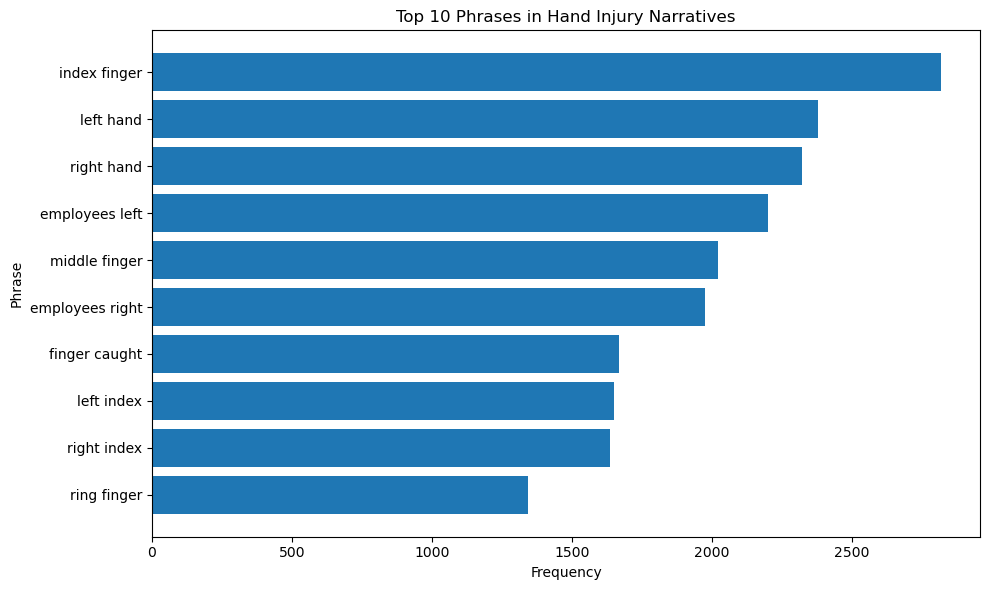

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re

# If your filtered dataframe is called filtered_df
narratives = df['Final Narrative'].dropna().str.lower()

# Clean the text (optional but helpful)
narratives = narratives.apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))  # remove punctuation
narratives = narratives.apply(lambda x: re.sub(r"\s+", " ", x).strip())

# Extract common 2- and 3-word phrases
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english', max_features=1000)
X = vectorizer.fit_transform(narratives)

# Sum word occurrences
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
top_phrases = pd.DataFrame(words_freq, columns=['Phrase', 'Frequency']).head(10)

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(top_phrases['Phrase'][::-1], top_phrases['Frequency'][::-1])
plt.title('Top 10 Phrases in Hand Injury Narratives')
plt.xlabel('Frequency')
plt.ylabel('Phrase')
plt.tight_layout()
plt.show()
